# GRIP Internship - Sparks Foundation

## Implementing Linear Regression from Scratch 

## Project 1 : Prediction using Supervised ML

#### By : Sarthak Rawat

## Problem Statement :

The data set is of The hours studied VS percentage obtained. Our aim is to fit linear regression line to the given data set and to predicted score if a student studies for 9.25 hrs/day

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Initialising Training set

In [2]:
url = "http://bit.ly/w-data"

data = pd.read_csv(url)

x_train = np.array(data.iloc[:,0])
y_train = np.array(data.iloc[:,1])

In [3]:
print("X: \n", x_train)
print("Y: \n", y_train)

X: 
 [2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]
Y: 
 [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## Number of training examples (m)

In [4]:
m = x_train.shape[0]
# OR : m = len(x_train)
print(m)

25


## Ploting data points

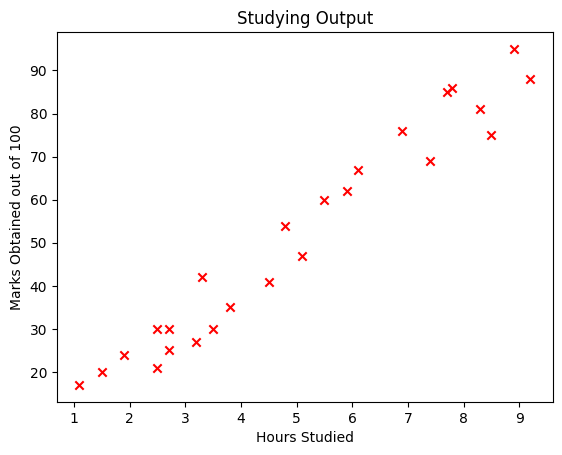

In [5]:
plt.scatter(x_train, y_train, marker = 'x', c = 'r')
plt.title("Studying Output")

plt.xlabel("Hours Studied")
plt.ylabel("Marks Obtained out of 100")

plt.show()

## Using Linear Regression Model Function

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

## initialising parameters w,b

In [6]:
w = np.random.randint(30)
b = np.random.randint(30)

## Compute Model function

Model function : $$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

In [7]:
def model_output(x_train, w, b):
    
    #initalising output array for model
    f_wb_array = np.zeros(m)
    
    for i in range(m):
        f_wb_array[i] = w * x_train[i] + b
        
    return f_wb_array

In [8]:
f_wb = model_output(x_train, w, b)
print(f_wb)

[ 87.  159.8 106.6 255.  115.   59.  274.6 171.  249.4  92.6 232.6 182.2
 143.  109.4  47.8 266.2  87.   70.2 187.8 224.2  92.6 151.4 123.4 210.2
 235.4]


## Plot Model Function

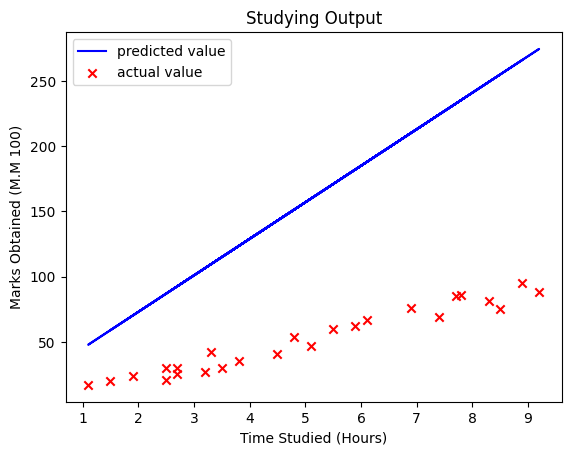

In [9]:
#plotting predicted value line
plt.plot(x_train, f_wb, c = 'b', label = 'predicted value')

#plotting actual values
plt.scatter(x_train, y_train, marker = 'x', c = 'r', label = 'actual value')

plt.title("Studying Output")

plt.xlabel("Time Studied (Hours)")
plt.ylabel("Marks Obtained (M.M 100)")

plt.legend()
plt.show()

## Cost Function

We will use cost function to find out the difference between actual and predicted values and will ultimately minimise this using gradient descent

Cost Function : $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

## Compute Cost Function

In [10]:
def cost_output(x_train, y_train, w, b):
    
    f_wb = model_output(x_train, w, b)
    
    cost_tmp = 0
    
    for i in range(m):
        cost_tmp = (f_wb[i] - y_train[i]) ** 2
        
    final_cost = cost_tmp / (2 * m)
    
    return final_cost

In [11]:
print("Cost Before Gradient Descent :", cost_output(x_train, y_train, w, b))

Cost Before Gradient Descent : 446.4072


## Gradient Descent 

Now we will apply the gradient descent algorithm. This will find value of w,b which will minimise the cost function

### Gradient Descent Algorithm

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  

### Gradients

The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

# Compute Gradient

In [12]:
def gradient_output(x_train, y_train, w, b):
    
    dj_dw = 0
    dj_db = 0
    
    f_wb = model_output(x_train, w, b)
    
    for i in range(m):
        dj_dw += (f_wb[i] - y_train[i]) * x_train[i]
        dj_db += (f_wb[i] - y_train[i])
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

## Compute Gradient Descent

In [13]:
def gradient_descent_output(x_train, y_train, w_init, b_init, alpha, iterations):
    
    w = w_init
    b = b_init
    
    for i in range(iterations):
        
        dj_dw, dj_db = gradient_output(x_train, y_train, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
    return w,b

In [14]:
#initalizing parameters
iterations = 10000
alpha = 1.0e-2

w_final, b_final = gradient_descent_output(x_train, y_train, w, b, alpha, iterations)

print("Optimized Value of w: ", w_final)
print("Optimized Value of b: ", b_final)

Optimized Value of w:  9.775803381708137
Optimized Value of b:  2.4836734616212572


## Plotting Prediction


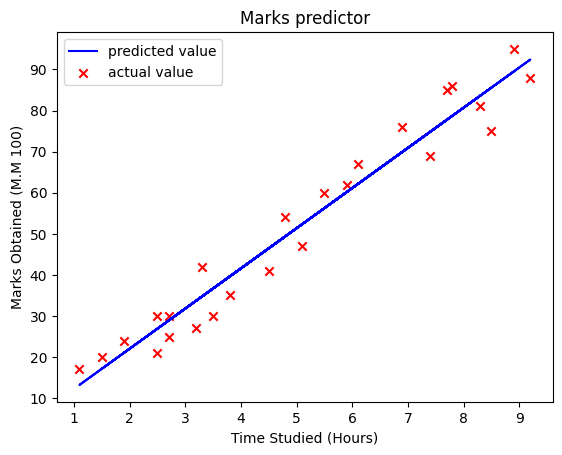

In [15]:
fig, ax = plt.subplots()


#plotting predicted value line
ax.plot(x_train, model_output(x_train, w_final, b_final), c = 'b', label = 'predicted value')

#plotting actual values
ax.scatter(x_train, y_train, marker = 'x', c = 'r', label = 'actual value')

plt.title("Marks predictor")

plt.xlabel("Time Studied (Hours)")
plt.ylabel("Marks Obtained (M.M 100)")

plt.legend()
plt.show()

## Prediction

In [16]:
x_test = float(input())
print(f"Marks obtained if studied for {x_test} hours = ", (w_final*x_test) + b_final)

9.25
Marks obtained if studied for 9.25 hours =  92.90985474242152


## Evaluating Model

In [17]:
final_cost = cost_output(x_train,y_train, w_final, b_final)

print("Cost after fitting : ", final_cost)

Cost after fitting :  1.0556219828750537
